<img src="./fondo.png">

<img src="./presentacion.png">

# Modelo Regresión Lineal

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [272]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [274]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [546]:
# Cargar los datos
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [548]:
#Renombro nombre a las columnas

titanic_data = titanic_data.rename(columns={'Survived': 'Sobrevivio', 
                             'Name': 'Nombre',
                             'Sex': 'Sexo',
                             'Age': 'Edad',
                             'Fare': 'Tarifa',
                             'Embarked': 'Embarcado'
                            })

In [550]:
#Lectua de datos

titanic_data.head()

,PassengerId,Sobrevivio,Pclass,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Tarifa,Cabin,Embarcado
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [552]:
# Descripcion de los datos
titanic_data.describe()

,PassengerId,Sobrevivio,Pclass,Edad,SibSp,Parch,Tarifa
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificar datos faltantes y atípicos')

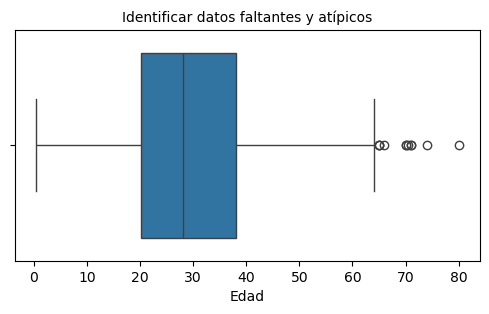

In [554]:
# Identificacion de datos faltantes y atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x = titanic_data['Edad'])
plt.title('Identificar datos faltantes y atípicos', fontsize = 10)

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [557]:
# Revisión de datos faltantes

print('Cantidad de registros vacios en Edad: ', titanic_data['Edad'].isnull().sum())
print('Cantidad de registros vacios en Cabina: ', titanic_data['Cabin'].isnull().sum())
print('Cantidad de registros vacios en Embarcado: ', titanic_data['Embarcado'].isnull().sum())

Cantidad de registros vacios en Edad:  177
Cantidad de registros vacios en Cabina:  687
Cantidad de registros vacios en Embarcado:  2


In [559]:
# Reemplazar valores vacíos en columnas alfanuméricas
titanic_data['Edad'] = titanic_data['Edad'].fillna(titanic_data['Edad'].mean())
titanic_data['Cabin'] = titanic_data['Cabin'].fillna('Unknown')
titanic_data['Embarcado'] = titanic_data['Embarcado'].fillna('Unknown')

In [561]:
# verificar datos

print(titanic_data.isnull().sum())

PassengerId    0
Sobrevivio     0
Pclass         0
Nombre         0
Sexo           0
Edad           0
SibSp          0
Parch          0
Ticket         0
Tarifa         0
Cabin          0
Embarcado      0
dtype: int64


Text(0.5, 1.0, 'Identificar datos atípicos')

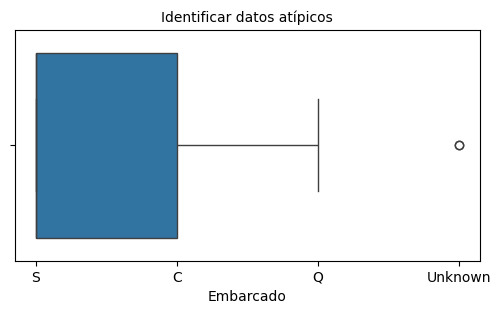

In [563]:
# Identificacion de datos atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x = titanic_data['Embarcado'])
plt.title('Identificar datos atípicos', fontsize = 10)

In [565]:
# Conteo de datos atípicos

lvl_minimo = 18
lvl_maximo = 99
total_atipicos = ((titanic_data['Edad'] < lvl_minimo) | (titanic_data['Edad'] > lvl_maximo)).sum()
print('El total de datos atípicos es {}'.format(total_atipicos))

El total de datos atípicos es 113


In [567]:
# Filtra datos atípicos

titanic_data = titanic_data[(titanic_data['Edad'] < lvl_maximo) & (titanic_data['Edad'] >= lvl_minimo)]

In [569]:
# Revisión del tipo de datos y datos faltantes

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  778 non-null    int64  
 1   Sobrevivio   778 non-null    int64  
 2   Pclass       778 non-null    int64  
 3   Nombre       778 non-null    object 
 4   Sexo         778 non-null    object 
 5   Edad         778 non-null    float64
 6   SibSp        778 non-null    int64  
 7   Parch        778 non-null    int64  
 8   Ticket       778 non-null    object 
 9   Tarifa       778 non-null    float64
 10  Cabin        778 non-null    object 
 11  Embarcado    778 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 79.0+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [572]:
# Reemplazar valores en la columna 'Sexo'
titanic_data['Sexo'] = titanic_data['Sexo'].map({'male': 0, 'female': 1})
titanic_data.head()

,PassengerId,Sobrevivio,Pclass,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Tarifa,Cabin,Embarcado
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S


In [574]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo y las características
X = titanic_data[['Sexo', 'Tarifa', 'Edad']] # Características relevantes
Y = titanic_data[['Sobrevivio']] # Variable objetivo

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [577]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [579]:
# Mostrar las dimensiones de los conjuntos resaltantes
print("Dimensiones del conjunto de entrenamiento:")
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("\nDimensiones del conjunto de prueba:")
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

Dimensiones del conjunto de entrenamiento:
X_train: (622, 3)
Y_train: (622, 1)

Dimensiones del conjunto de prueba:
X_test: (156, 3)
Y_test: (156, 1)


## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [582]:
# Crear el modelo con hiperparámetros configurados
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
model.fit(X_train, Y_train.values.ravel())

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [584]:
# Obtener la importancia de las características
importance = model.feature_importances_

In [586]:
# Evaluación del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.14
R^2 Score: 0.41


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [589]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [591]:
# Calcular las métricas 
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

In [593]:
# Mostrar las métricas
print("Evaluación del Modelo en el conjunto de Test:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Evaluación del Modelo en el conjunto de Test:
Mean Absolute Error (MAE): 0.25
Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE): 0.37
R^2 Score: 0.41


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

In [596]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

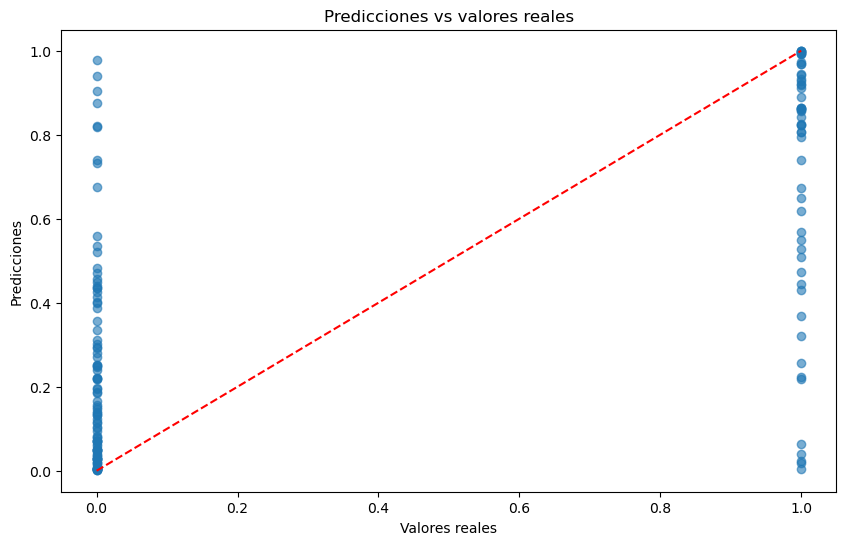

In [598]:
# Gráfioca de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title('Predicciones vs valores reales')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()

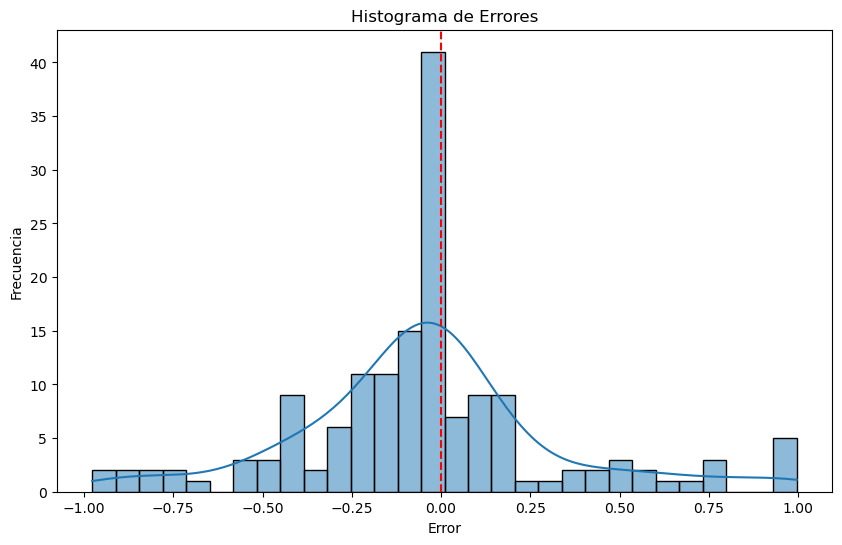

In [600]:
# Histograma de Errores
errors = Y_test.values.ravel() - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Histograma de Errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='--')
plt.show()

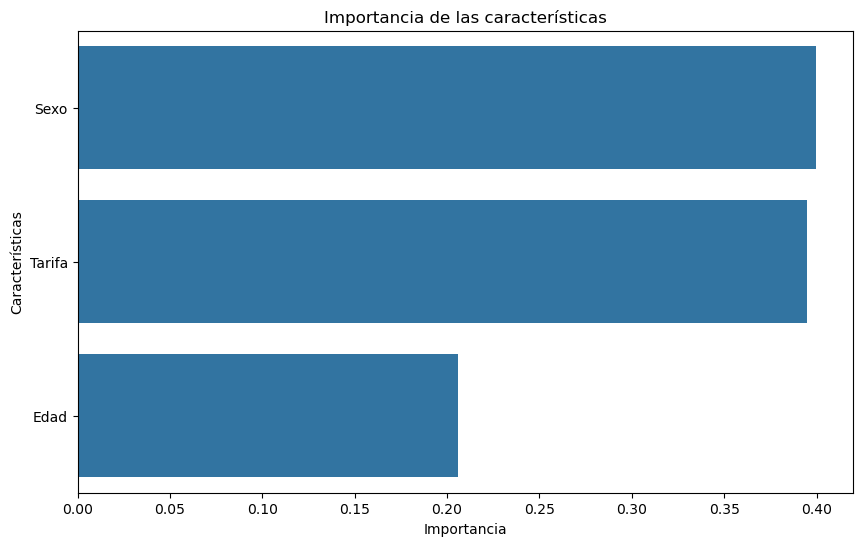

In [602]:
# Grafica de importancia de características
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

El código entrenó un modelo de **RandomForestRegressor** para predecir la probabilidad de supervivencia de los pasajeros del Titanic utilizando características como `Sexo`, `Tarifa` y `Edad`. Se evaluó el modelo con diversas métricas:

1. **MAE (Error Absoluto Medio)**: Medida de la magnitud promedio de los errores sin considerar la dirección.
2. **MSE (Error Cuadrático Medio)**: Penaliza más los errores grandes, mostrando el "tamaño" total del error.
3. **RMSE (Raíz del Error Cuadrático Medio)**: Es la raíz cuadrada del MSE y está en las mismas unidades que los datos reales.
4. **R² (Coeficiente de Determinación)**: Indica qué porcentaje de la variabilidad de los datos es explicado por el modelo, donde un valor cercano a 1 es deseable.

El modelo mostró un rendimiento razonable en la predicción de la supervivencia, pero podría mejorarse con ajustes en los hiperparámetros o al probar otros algoritmos. Además, se identificaron las características más importantes (como `Sexo` y `Edad`) para la predicción. El gráfico de "Predicciones vs Valores Reales" mostró la dispersión de los puntos y ayudó a identificar áreas donde el modelo podría no estar prediciendo con precisión.

**Conclusión**: El modelo tiene un desempeño aceptable, pero para mejorar la precisión, se podrían optimizar los hiperparámetros o explorar otros modelos y características adicionales.